## Random sample generation from a specific pdf

# 

### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy import *
from tabulate import tabulate
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from scipy.special import factorial
import seaborn as sns
from scipy.stats import gamma, chi2
from scipy import stats
import sympy as sym

# 1.

### Initial values

In [2]:
np.random.seed(20200314)
r = 2
n = 5000
z = np.random.normal(0, 1, n)
u = np.random.uniform(0,1,n)

### Sampling

In [3]:
v = (r - 1/3)*(1+z/np.sqrt(9*(r - 1/3)))**3
z = z[v > 0]
u = u[v > 0]
v = v[v > 0]
g = np.exp(((z**2)/2) + (r - 1/3)*np.log(v/(r - 1/3)) - v + (r - 1/3))
keep = (u <= g) * np.arange(1,len(v)+1)

### Acceptance Rate

In [4]:
(len(keep)-len(keep[keep==0]))/n    

0.984

### Plot similar to FIGURE 6.2.

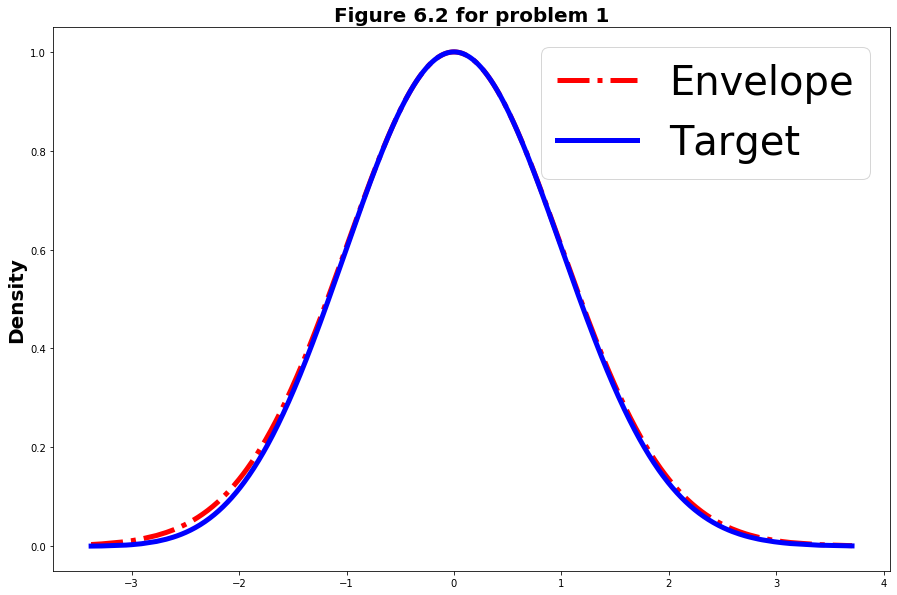

In [5]:
plt.figure(figsize=(15,10))
z = np.sort(z)
t = (r - 1/3)*(1+z/np.sqrt(9*(r - 1/3)))**3
plt.plot(z,np.exp(-(z**2)/2),'r-.',lw=5)
plt.plot(z,np.exp((r - 1/3)*np.log(t/(r - 1/3)) - t + (r - 1/3)),'b',lw=5)
plt.ylabel('Density',weight='bold',fontsize=20)
plt.title('Figure 6.2 for problem 1',weight='bold',fontsize=20)
plt.legend(['Envelope','Target'],fontsize=40)
plt.show()

## a, b, c

Text(0, 0.5, 'Probability')

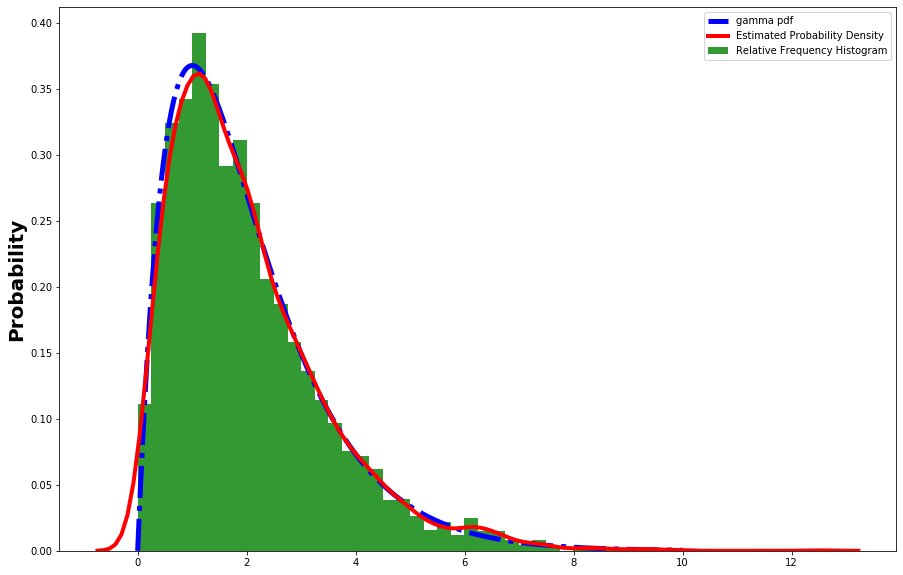

In [6]:
plt.figure(figsize=(15,10))
plt.plot(np.linspace(0,10, 5000), gamma.pdf(np.linspace(0,10, 5000), 2),'b-.', lw=5, alpha=1, label='gamma pdf')
sns.distplot(v[keep!=0],kde=True,kde_kws={"color": "r", "lw": 4, "label": "Estimated Probability Density"},
            hist_kws={"label": "Relative Frequency Histogram", "linewidth": 35,
                            "alpha": 0.8, "color": "g"})
plt.ylabel('Probability',weight='bold',fontsize=20)

# Q.2

### Function definition

In [7]:
x = sym.Symbol('x')
f = (1/12)*(1+x)*exp(-(x-1)**2/(2*x))
g = lambdify(x,f, 'numpy')

### Sampling

In [8]:
x= np.linspace(0,15, 5000)
s = []
for i in range(5000):
    z = 1.1*chi2.rvs(3.75)
    u = np.random.uniform(0, 1)
    if u <= g(z)/(1.1*chi2.pdf(z, 3.75)):
         s.append(z)

### Acceptance Rate

In [9]:
len(s)/5000

0.92

### Plot similar to FIGURE 6.2.

<string>:2: RuntimeWarning: divide by zero encountered in true_divide


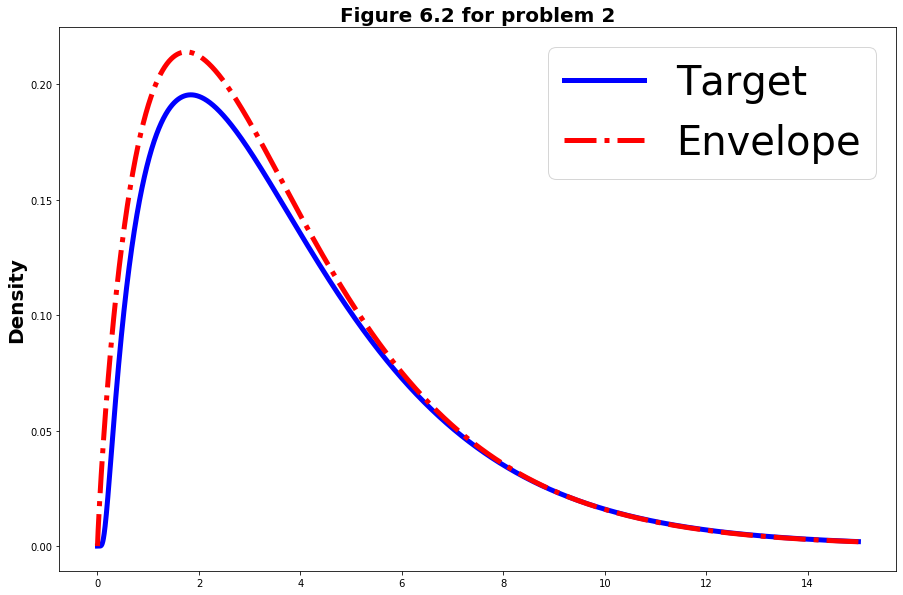

In [10]:
plt.figure(figsize=(15,10))
plt.plot(x, g(x),'b',lw=5)
plt.plot(x, 1.1*chi2.pdf(x, 3.75),'r-.',lw=5)
plt.ylabel('Density',weight='bold',fontsize=20)
plt.title('Figure 6.2 for problem 2',weight='bold',fontsize=20)
plt.legend(['Target','Envelope'],fontsize=40)
plt.show()

### a, b, c

Text(0, 0.5, 'Probability')

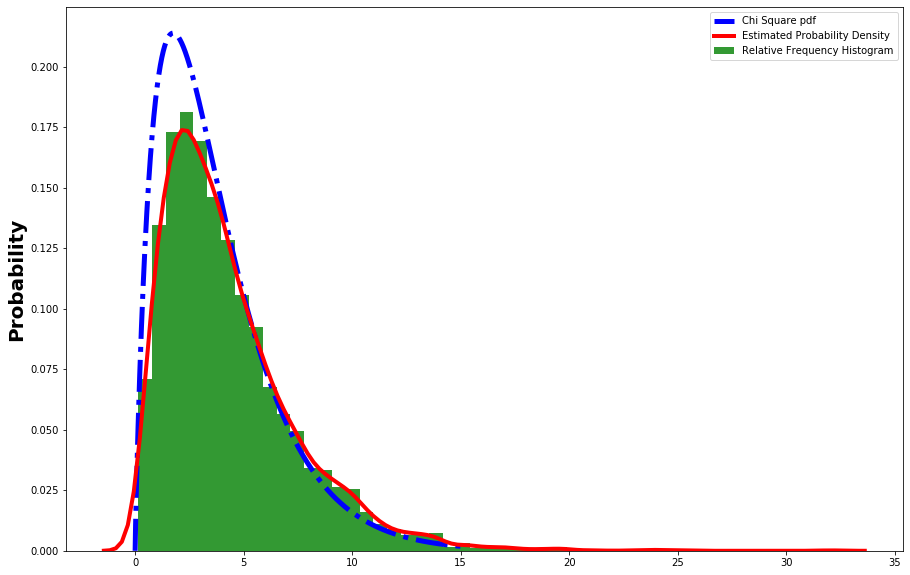

In [11]:
plt.figure(figsize=(15,10))
plt.plot(x, 1.1*chi2.pdf(x, 3.75),'b-.', lw=5, alpha=1, label='Chi Square pdf')
sns.distplot(s,kde=True,kde_kws={"color": "r", "lw": 4, "label": "Estimated Probability Density"},
            hist_kws={"label": "Relative Frequency Histogram", "linewidth": 35,
                            "alpha": 0.8, "color": "g"})
plt.ylabel('Probability',weight='bold',fontsize=20)